## **IT3212 - Assignment 1 - Group 25**

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['axes.xmargin'] = 0
import seaborn as sns
import random
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from IPython.display import display, HTML
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
RANDOM_SEED = 0
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

In [2]:
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False) 

- [Task 1 - Data Exploration](#task_1)
- [Task 2 - Data Cleaning](#task_2)
- [Task 3 - Handling Outliers](#task_3)
- [Task 4 - Data Transformation](#task_4)
- [Task 5 - Data Splitting](#task_5)
- [Task 6 - Bonus Task](#task_6)

 ___
 <a id='task_1'></a>
### **TASK 1 - Data Exploration (10p)**
___

**(a) Explore the dataset by**
- ✅ displaying the first few rows
- ✅ summary statistics
- ✅ data types of each column

**(b) Identify**
- ✅ missing values and outliers
- ✅ unique values in categorical columns

### **Load datasets**

In [136]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
df_oil = pd.read_csv('../data/oil.csv')
df_holidays_events = pd.read_csv('../data/holidays_events.csv')
df_stores = pd.read_csv('../data/stores.csv')
df_transactions = pd.read_csv('../data/transactions.csv')

In [137]:
df_stores = df_stores.rename(columns={'type': 'type_stores'})
df_holidays_events = df_holidays_events.rename(columns={'type': 'type_holidays_events'})

In [138]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_holidays_events['date'] = pd.to_datetime(df_holidays_events['date'])
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

dataframes = {
    'Training dataset': df_train,
    'Oil price dataset' :df_oil,
    'Holidays and events dataset': df_holidays_events,
    'Stores dataset': df_stores,
    'Transactions dataset': df_transactions
}

### **Display the first 5 rows**

In [6]:
for name, df in dataframes.items():
    display(HTML(f"<h3 style='color: black;'>{name}</h3>"))
    display(df.head())

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.140
2,2013-01-03,92.970
3,2013-01-04,93.120
4,2013-01-07,93.200


,date,type_holidays_events,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


,store_nbr,city,state,type_stores,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


### **Display the summary statistics for numerical columns**

In [7]:
for name, df in dataframes.items():
    display(HTML(f"<h3 style='color: black;'>{name}</h3>"))
    display(df.describe())

,id,date,store_nbr,sales,onpromotion
count,3000888.000,3000888,3000888.000,3000888.000,3000888.000
mean,1500443.500,2015-04-24 08:27:04.703088384,27.500,357.776,2.603
min,0.000,2013-01-01 00:00:00,1.000,0.000,0.000
25%,750221.750,2014-02-26 18:00:00,14.000,0.000,0.000
50%,1500443.500,2015-04-24 12:00:00,27.500,11.000,0.000
75%,2250665.250,2016-06-19 06:00:00,41.000,195.847,0.000
max,3000887.000,2017-08-15 00:00:00,54.000,124717.000,741.000
std,866281.892,NaN,15.586,1101.998,12.219


,date,dcoilwtico
count,1218,1175.000
mean,2015-05-02 12:00:00,67.714
min,2013-01-01 00:00:00,26.190
25%,2014-03-03 06:00:00,46.405
50%,2015-05-02 12:00:00,53.190
75%,2016-06-30 18:00:00,95.660
max,2017-08-31 00:00:00,110.620
std,NaN,25.630


,date
count,350
mean,2015-04-24 00:45:15.428571392
min,2012-03-02 00:00:00
25%,2013-12-23 06:00:00
50%,2015-06-08 00:00:00
75%,2016-07-03 00:00:00
max,2017-12-26 00:00:00


,store_nbr,cluster
count,54.000,54.000
mean,27.500,8.481
std,15.732,4.693
min,1.000,1.000
25%,14.250,4.000
50%,27.500,8.500
75%,40.750,13.000
max,54.000,17.000


,date,store_nbr,transactions
count,83488,83488.000,83488.000
mean,2015-05-20 16:07:40.866232064,26.939,1694.602
min,2013-01-01 00:00:00,1.000,5.000
25%,2014-03-27 00:00:00,13.000,1046.000
50%,2015-06-08 00:00:00,27.000,1393.000
75%,2016-07-14 06:00:00,40.000,2079.000
max,2017-08-15 00:00:00,54.000,8359.000
std,NaN,15.608,963.287


### **Display the data type of each column**

In [8]:
for name, df in dataframes.items():
    display(HTML(f"<h3 style='color: black;'>{name}</h3>"))
    display(df.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           3000888 non-null  int64         
 1   date         3000888 non-null  datetime64[ns]
 2   store_nbr    3000888 non-null  int64         
 3   family       3000888 non-null  object        
 4   sales        3000888 non-null  float64       
 5   onpromotion  3000888 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  350 non-null    datetime64[ns]
 1   type_holidays_events  350 non-null    object        
 2   locale                350 non-null    object        
 3   locale_name           350 non-null    object        
 4   description           350 non-null    object        
 5   transferred           350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   store_nbr    54 non-null     int64 
 1   city         54 non-null     object
 2   state        54 non-null     object
 3   type_stores  54 non-null     object
 4   cluster      54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


None

### **Check for missing values**

In [9]:
for name, df in dataframes.items():
    display(HTML(f"<h3 style='color: black;'>{name}</h3>"))
    display(df.isnull().sum())

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

date           0
dcoilwtico    43
dtype: int64

date                    0
type_holidays_events    0
locale                  0
locale_name             0
description             0
transferred             0
dtype: int64

store_nbr      0
city           0
state          0
type_stores    0
cluster        0
dtype: int64

date            0
store_nbr       0
transactions    0
dtype: int64

### **Check for outliers (time-series inspection)**

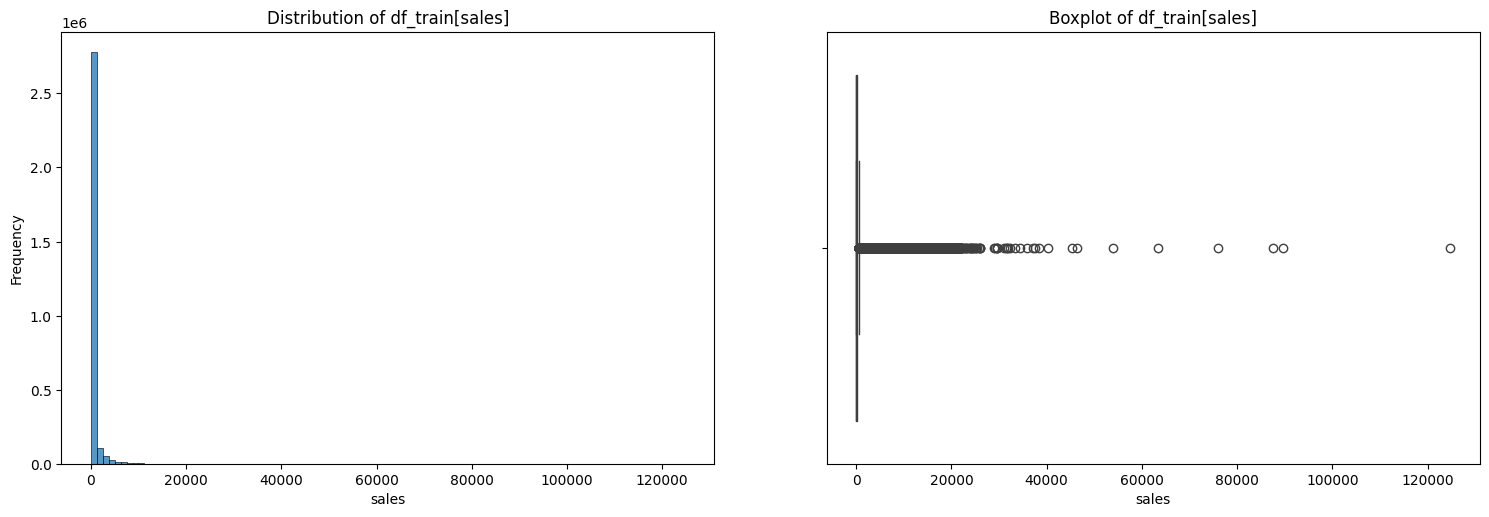

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
fig.tight_layout(pad=5.0)
    
sns.histplot(df_train['sales'], bins=100, ax=axes[0])
axes[0].set_title(f'Distribution of df_train[sales]')
axes[0].set_xlabel('sales')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=df_train['sales'], ax=axes[1])
axes[1].set_title(f'Boxplot of df_train[sales]')
axes[1].set_xlabel('sales')
plt.show()

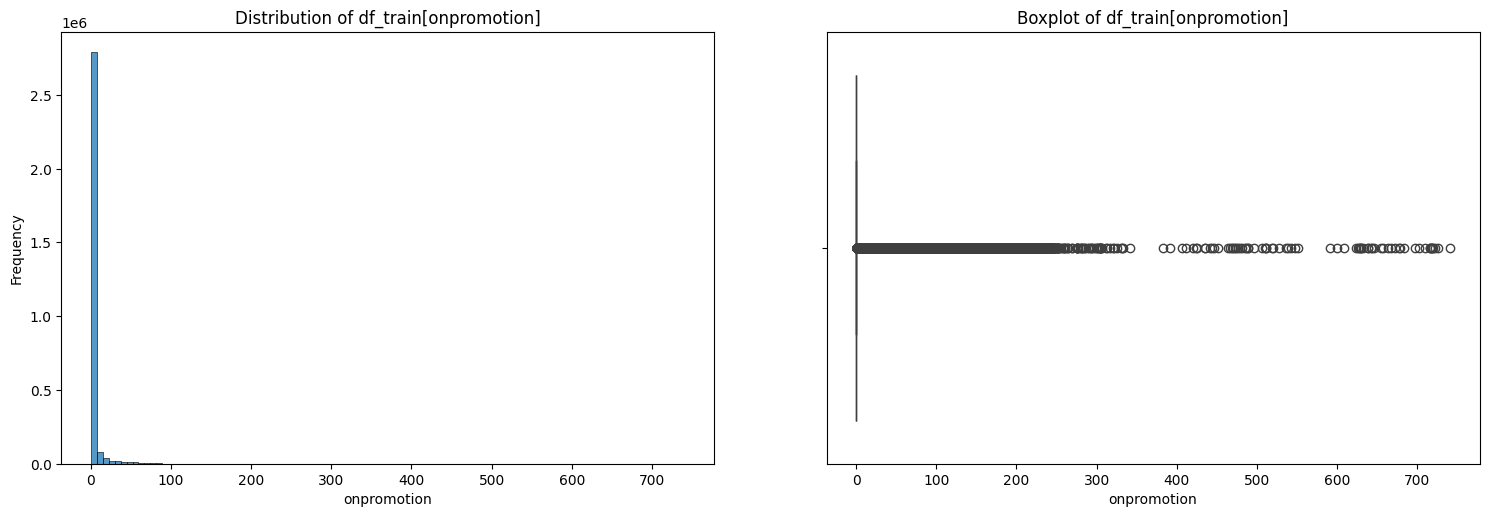

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
fig.tight_layout(pad=5.0)
    
sns.histplot(df_train['onpromotion'], bins=100, ax=axes[0])
axes[0].set_title(f'Distribution of df_train[onpromotion]')
axes[0].set_xlabel('onpromotion')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=df_train['onpromotion'], ax=axes[1])
axes[1].set_title(f'Boxplot of df_train[onpromotion]')
axes[1].set_xlabel('onpromotion')
plt.show()

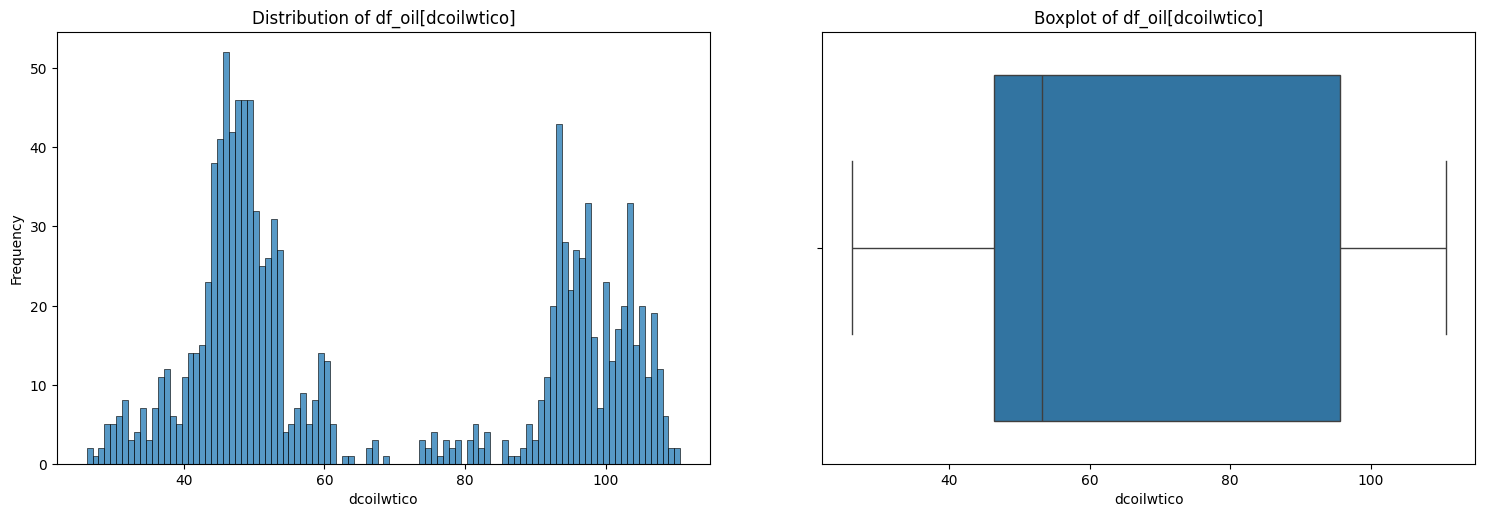

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
fig.tight_layout(pad=5.0)
    
sns.histplot(df_oil['dcoilwtico'], bins=100, ax=axes[0])
axes[0].set_title(f'Distribution of df_oil[dcoilwtico]')
axes[0].set_xlabel('dcoilwtico')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=df_oil['dcoilwtico'], ax=axes[1])
axes[1].set_title(f'Boxplot of df_oil[dcoilwtico]')
axes[1].set_xlabel('dcoilwtico')
plt.show()

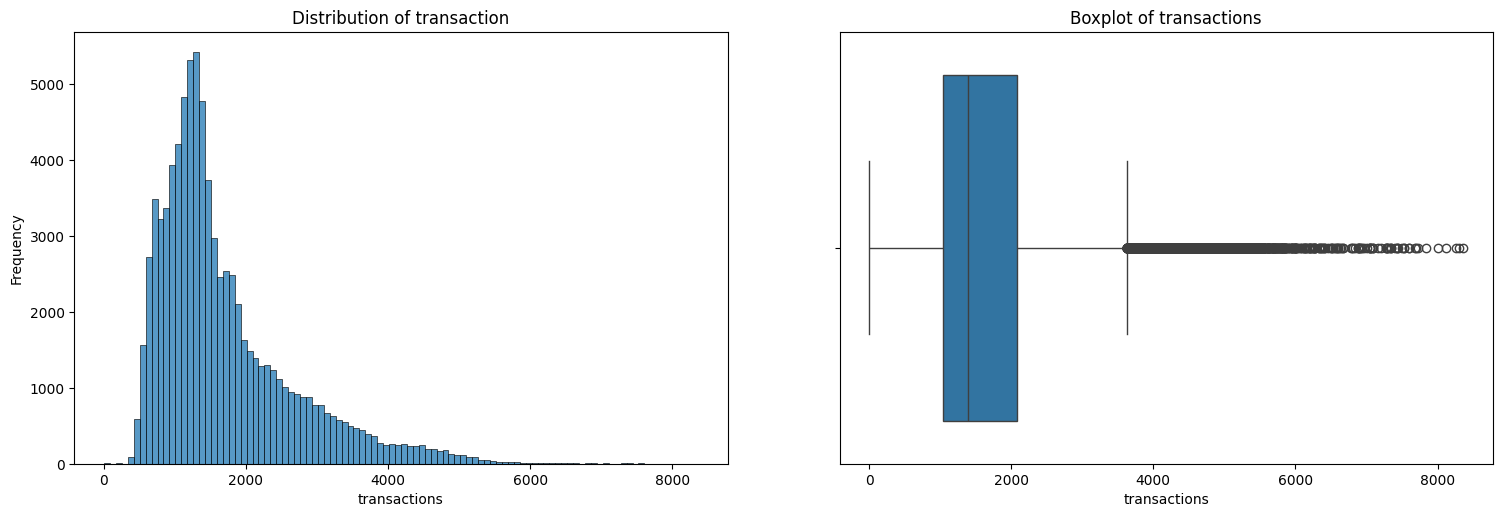

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
fig.tight_layout(pad=5.0)
    
sns.histplot(df_transactions['transactions'], bins=100, ax=axes[0])
axes[0].set_title(f'Distribution of transaction')
axes[0].set_xlabel('transactions')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=df_transactions['transactions'], ax=axes[1])
axes[1].set_title(f'Boxplot of transactions')
axes[1].set_xlabel('transactions')
plt.show()

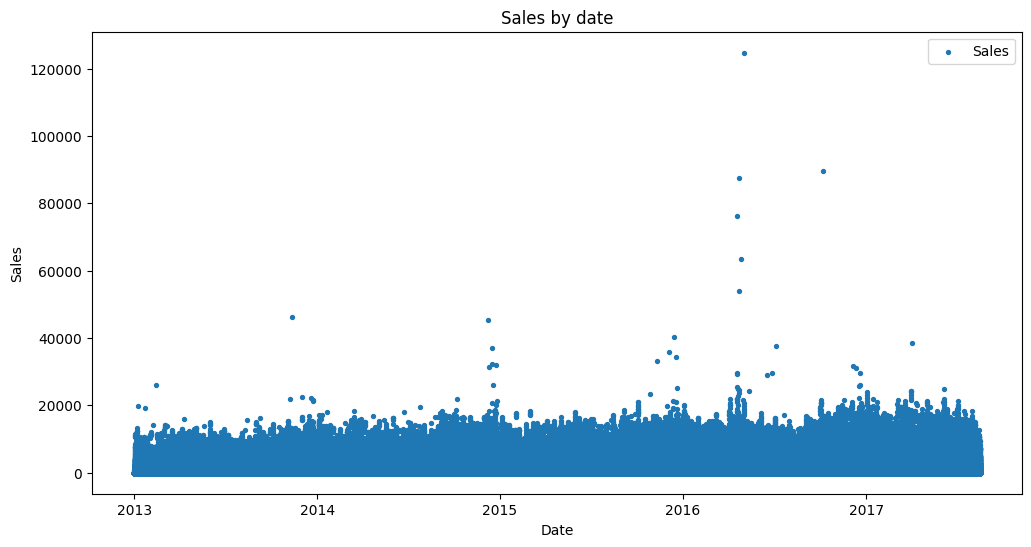

In [14]:
plt.figure(figsize=(12, 6))
plt.scatter(x=df_train['date'], y=df_train['sales'], label='Sales', marker='o', s=8)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales by date')
plt.legend()
plt.show()

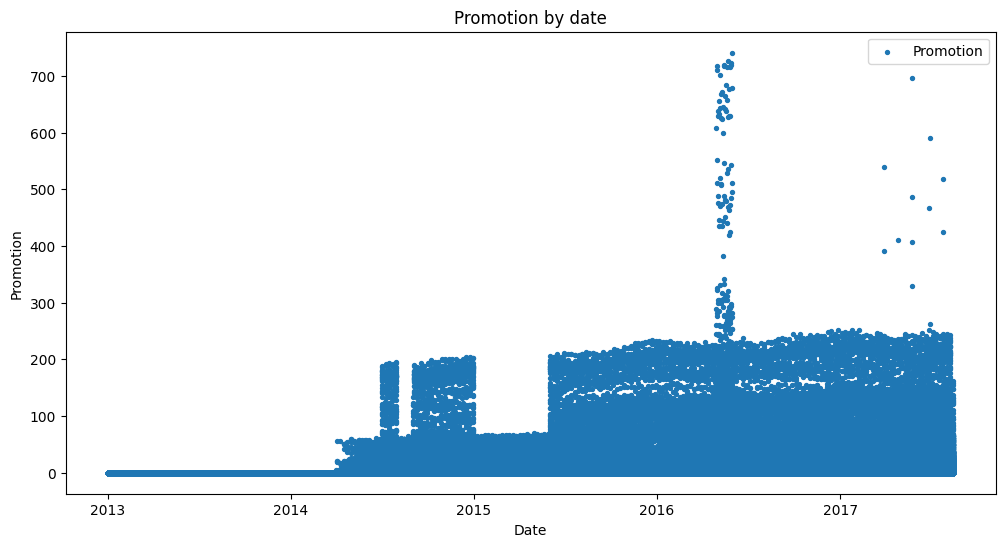

In [15]:
plt.figure(figsize=(12, 6))
plt.scatter(x=df_train['date'], y=df_train['onpromotion'], label='Promotion', marker='o', s=8)
plt.xlabel('Date')
plt.ylabel('Promotion')
plt.title('Promotion by date')
plt.legend()
plt.show()

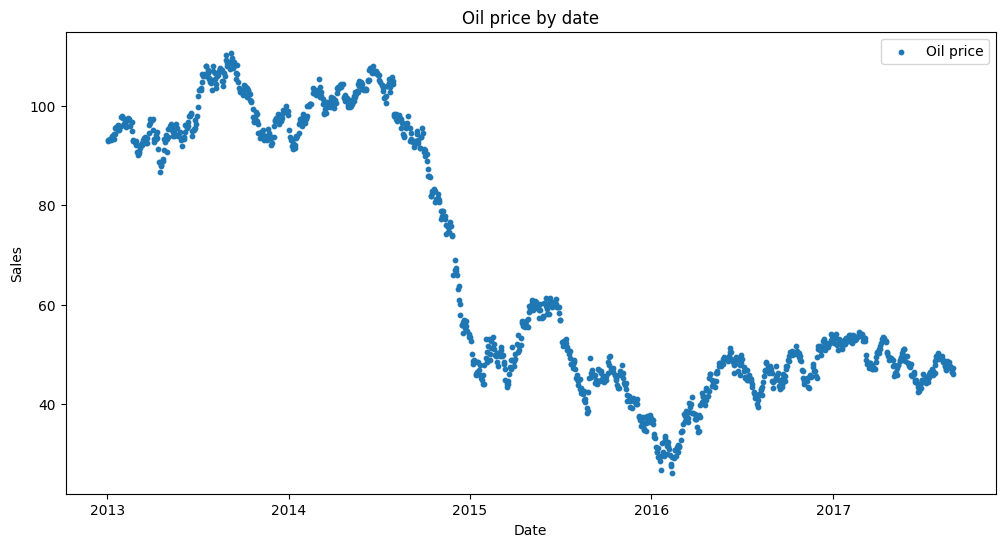

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(x=df_oil['date'], y=df_oil['dcoilwtico'], label='Oil price', marker='o', s=10)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Oil price by date')
plt.legend()
plt.show()

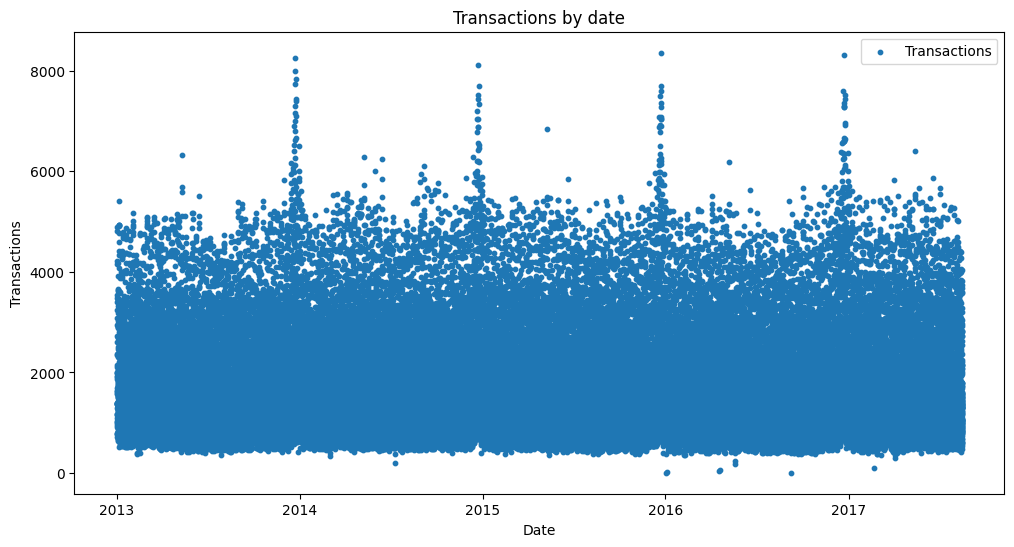

In [17]:
plt.figure(figsize=(12, 6))
plt.scatter(x=df_transactions['date'], y=df_transactions['transactions'], label='Transactions', marker='o', s=10)
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.title('Transactions by date')
plt.legend()
plt.show()

### **Check for unique values in categorical columns**

In [18]:
for name, df in dataframes.items():
    display(HTML(f"<h3 style='color: black;'>{name}</h3>"))
    columns_to_display = list(df.select_dtypes(include=["object"]).columns) 
    if 'store_nbr' in df:
        columns_to_display.append('store_nbr')
    columns_to_display = [column for column in columns_to_display if column != 'date']
    display(
        HTML(
            pd.DataFrame(
                [
                    {
                        "Column Name": column,
                        "Unique Values": ", ".join(map(str, df[column].unique())),
                    }
                    for column in columns_to_display
                ]
            ).to_html(index=False)
        )
    )

Column Name,Unique Values
family,"AUTOMOTIVE, BABY CARE, BEAUTY, BEVERAGES, BOOKS, BREAD/BAKERY, CELEBRATION, CLEANING, DAIRY, DELI, EGGS, FROZEN FOODS, GROCERY I, GROCERY II, HARDWARE, HOME AND KITCHEN I, HOME AND KITCHEN II, HOME APPLIANCES, HOME CARE, LADIESWEAR, LAWN AND GARDEN, LINGERIE, LIQUOR,WINE,BEER, MAGAZINES, MEATS, PERSONAL CARE, PET SUPPLIES, PLAYERS AND ELECTRONICS, POULTRY, PREPARED FOODS, PRODUCE, SCHOOL AND OFFICE SUPPLIES, SEAFOOD"
store_nbr,"1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5, 50, 51, 52, 53, 54, 6, 7, 8, 9"


Column Name,Unique Values
type_holidays_events,"Holiday, Transfer, Additional, Bridge, Work Day, Event"
locale,"Local, Regional, National"
locale_name,"Manta, Cotopaxi, Cuenca, Libertad, Riobamba, Puyo, Guaranda, Imbabura, Latacunga, Machala, Santo Domingo, El Carmen, Cayambe, Esmeraldas, Ecuador, Ambato, Ibarra, Quevedo, Santo Domingo de los Tsachilas, Santa Elena, Quito, Loja, Salinas, Guayaquil"
description,"Fundacion de Manta, Provincializacion de Cotopaxi, Fundacion de Cuenca, Cantonizacion de Libertad, Cantonizacion de Riobamba, Cantonizacion del Puyo, Cantonizacion de Guaranda, Provincializacion de Imbabura, Cantonizacion de Latacunga, Fundacion de Machala, Fundacion de Santo Domingo, Cantonizacion de El Carmen, Cantonizacion de Cayambe, Fundacion de Esmeraldas, Primer Grito de Independencia, Fundacion de Riobamba, Fundacion de Ambato, Fundacion de Ibarra, Cantonizacion de Quevedo, Independencia de Guayaquil, Traslado Independencia de Guayaquil, Dia de Difuntos, Independencia de Cuenca, Provincializacion de Santo Domingo, Provincializacion Santa Elena, Independencia de Guaranda, Independencia de Latacunga, Independencia de Ambato, Fundacion de Quito-1, Fundacion de Quito, Fundacion de Loja, Navidad-4, Cantonizacion de Salinas, Navidad-3, Navidad-2, Puente Navidad, Navidad-1, Navidad, Navidad+1, Puente Primer dia del ano, Primer dia del ano-1, Primer dia del ano, Recupero puente Navidad, Recupero puente primer dia del ano, Carnaval, Viernes Santo, Dia del Trabajo, Dia de la Madre-1, Dia de la Madre, Batalla de Pichincha, Fundacion de Guayaquil-1, Fundacion de Guayaquil, Inauguracion Mundial de futbol Brasil, Mundial de futbol Brasil: Ecuador-Suiza, Mundial de futbol Brasil: Ecuador-Honduras, Mundial de futbol Brasil: Ecuador-Francia, Mundial de futbol Brasil: Octavos de Final, Mundial de futbol Brasil: Cuartos de Final, Mundial de futbol Brasil: Semifinales, Mundial de futbol Brasil: Tercer y cuarto lugar, Mundial de futbol Brasil: Final, Black Friday, Cyber Monday, Recupero Puente Navidad, Recupero Puente Primer dia del ano, Terremoto Manabi, Terremoto Manabi+1, Terremoto Manabi+2, Terremoto Manabi+3, Terremoto Manabi+4, Terremoto Manabi+5, Terremoto Manabi+6, Terremoto Manabi+7, Terremoto Manabi+8, Terremoto Manabi+9, Terremoto Manabi+10, Terremoto Manabi+11, Terremoto Manabi+12, Terremoto Manabi+13, Terremoto Manabi+14, Terremoto Manabi+15, Terremoto Manabi+16, Terremoto Manabi+17, Terremoto Manabi+18, Terremoto Manabi+19, Terremoto Manabi+20, Terremoto Manabi+21, Terremoto Manabi+22, Terremoto Manabi+23, Terremoto Manabi+24, Terremoto Manabi+25, Terremoto Manabi+26, Terremoto Manabi+27, Terremoto Manabi+28, Terremoto Manabi+29, Terremoto Manabi+30, Traslado Batalla de Pichincha, Traslado Fundacion de Guayaquil, Traslado Primer Grito de Independencia, Puente Dia de Difuntos, Recupero Puente Dia de Difuntos, Traslado Primer dia del ano, Traslado Fundacion de Quito"


Column Name,Unique Values
city,"Quito, Santo Domingo, Cayambe, Latacunga, Riobamba, Ibarra, Guaranda, Puyo, Ambato, Guayaquil, Salinas, Daule, Babahoyo, Quevedo, Playas, Libertad, Cuenca, Loja, Machala, Esmeraldas, Manta, El Carmen"
state,"Pichincha, Santo Domingo de los Tsachilas, Cotopaxi, Chimborazo, Imbabura, Bolivar, Pastaza, Tungurahua, Guayas, Santa Elena, Los Rios, Azuay, Loja, El Oro, Esmeraldas, Manabi"
type_stores,"D, B, C, E, A"
store_nbr,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54"


Column Name,Unique Values
store_nbr,"25, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 36, 53, 20, 29, 21, 42, 22, 52"


___
<a id='task_2'></a>
### **TASK 2 - Data Cleaning (20p)**
___
**(a) Handling Missing Values** ✅ 

**(b) Choose appropriate methods to handle missing values** ✅ 

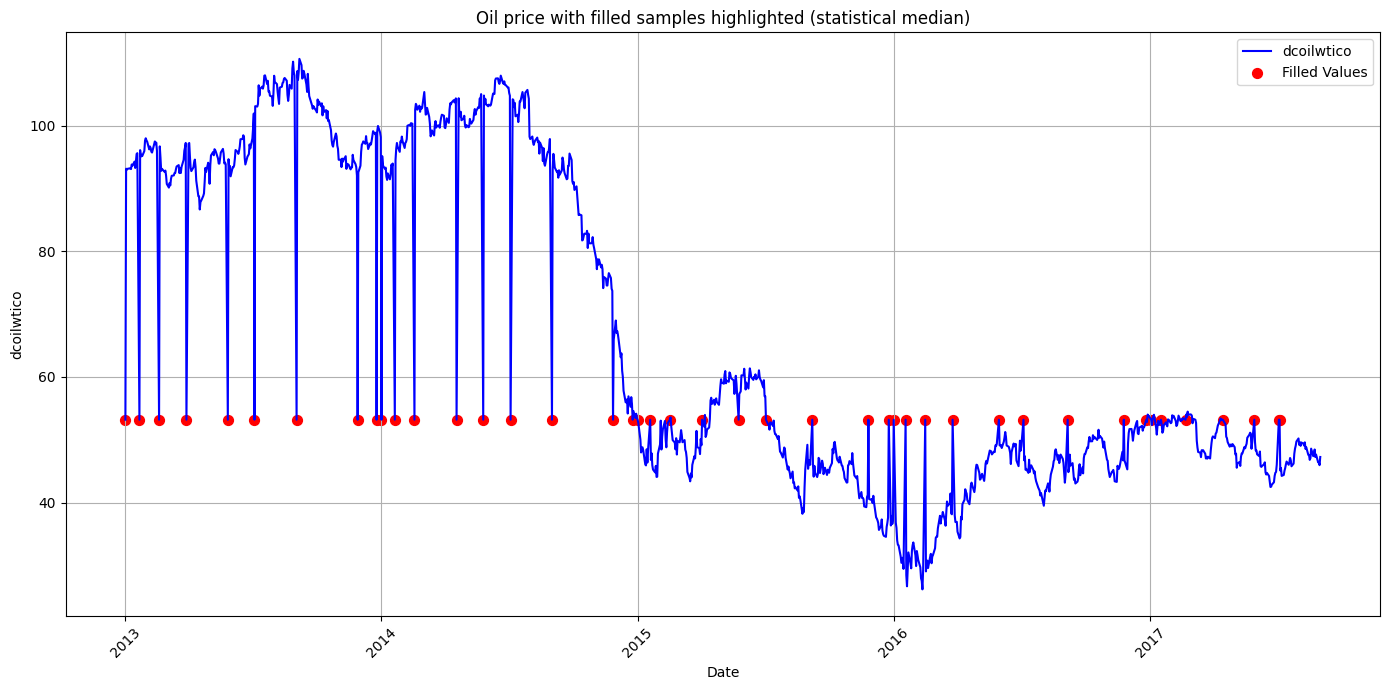

In [19]:
df_oil_copy = df_oil.copy()
median_value = df_oil_copy['dcoilwtico'].median()
original_dcoilwtico = df_oil_copy['dcoilwtico'].copy()
df_oil_copy['dcoilwtico'] = df_oil_copy['dcoilwtico'].fillna(median_value)
filled_mask = original_dcoilwtico.isnull()
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_oil_copy, x='date', y='dcoilwtico', color='blue', label='dcoilwtico', marker='', linestyle='-')
plt.scatter(df_oil_copy.loc[filled_mask, 'date'], 
    df_oil_copy.loc[filled_mask, 'dcoilwtico'], 
    color='red', label='Filled Values', s=50
)
plt.title('Oil price with filled samples highlighted (statistical median)')
plt.xlabel('Date')
plt.ylabel('dcoilwtico')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


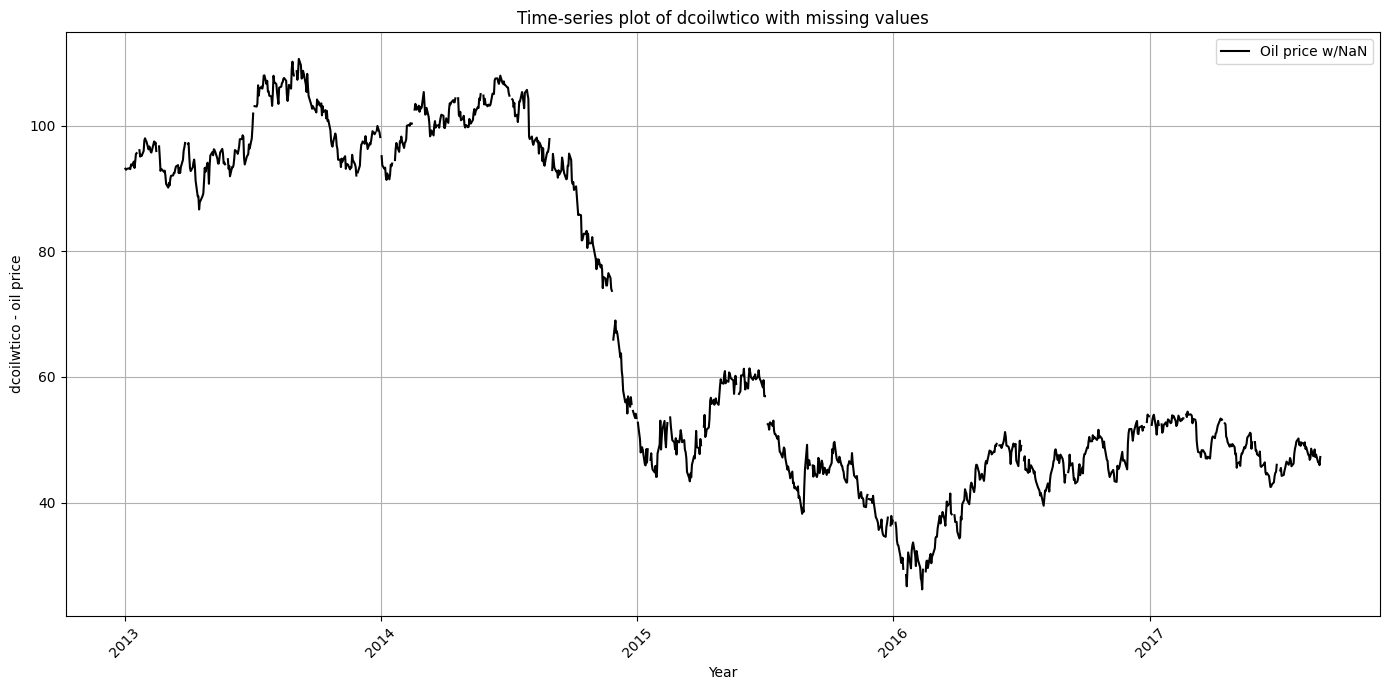

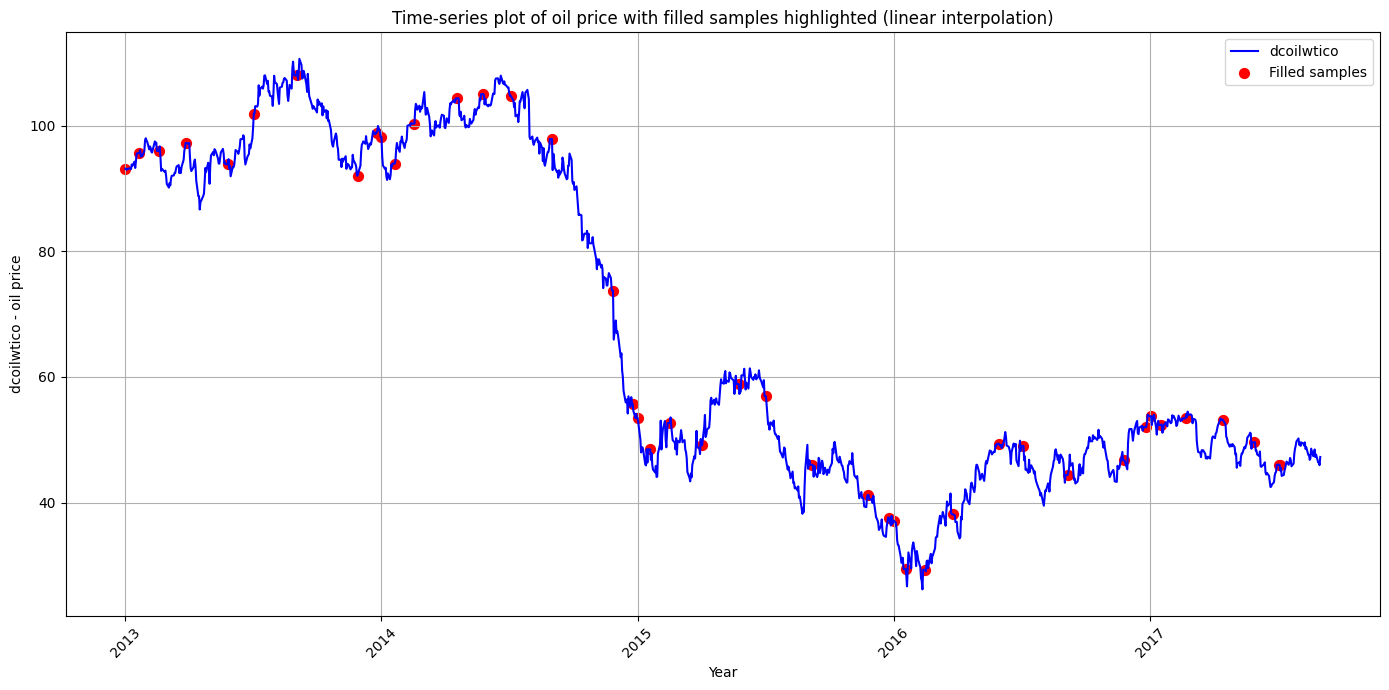

In [20]:
plt.figure(figsize=(14, 7))
plt.plot(df_oil['date'], df_oil['dcoilwtico'], color='black', label='Oil price w/NaN')
plt.title('Time-series plot of dcoilwtico with missing values')
plt.xlabel('Year')
plt.ylabel('dcoilwtico - oil price')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

df_oil_copy = df_oil.copy()
original_dcoilwtico = df_oil_copy['dcoilwtico'].copy()
df_oil_copy['dcoilwtico'] = df_oil_copy['dcoilwtico'].ffill().interpolate().bfill()
filled_mask = original_dcoilwtico.isnull()
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_oil_copy, x='date', y='dcoilwtico', color='blue', label='dcoilwtico', marker='', linestyle='-')
plt.scatter(df_oil_copy.loc[filled_mask, 'date'], 
            df_oil_copy.loc[filled_mask, 'dcoilwtico'], 
            color='red', label='Filled samples', s=50)
plt.title('Time-series plot of oil price with filled samples highlighted (linear interpolation)')
plt.xlabel('Year')
plt.ylabel('dcoilwtico - oil price')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

df_oil = df_oil_copy.copy()

In [21]:
print(df_oil.isnull().sum())

date          0
dcoilwtico    0
dtype: int64


**(c) Justify your choices for handling missing data** ✅ 
<br>
Initial data exploration revealed that only table oil['dcoilwtico_old'] is missing values. Dropping all rows containing one or several columns of missing values is a simple solution, but should be avoided if possible as you risk loosing too much valuable information. Secondly it introduces issues when trying feature engineering this table with others (mismatching rows). Of course if a column is missing major part of its data, one might consider discarding/deleting the column altogether.

By visual inspection there are no substantial sections missing, and those intervals of missing values seem to be of constant rate of change. If possible imputing missing values with statistical approximation methods is prefered. 

Statistical mean or median provide good estimates of missing values if the data is normally distributed, but dealing with oil prices these often vary quite stochasticly and the distribution was not normal. In this case interpolation was giving the best approximation of missing data. Note that interpolation is not able filling missing data point at starting/end of the data set. 

Forward fill and backward fill are methods considered particularly useful for time-series data. We used interpolation as the primary method, supplemented with backfill making sure the missing value in first row was handled correctly.

 <a id='task_3'></a>
___
### **TASK 3 - Handling Outliers (20p)**
___

**(a) Detect outliers using methods such as the IQR method or Z-score** ✅

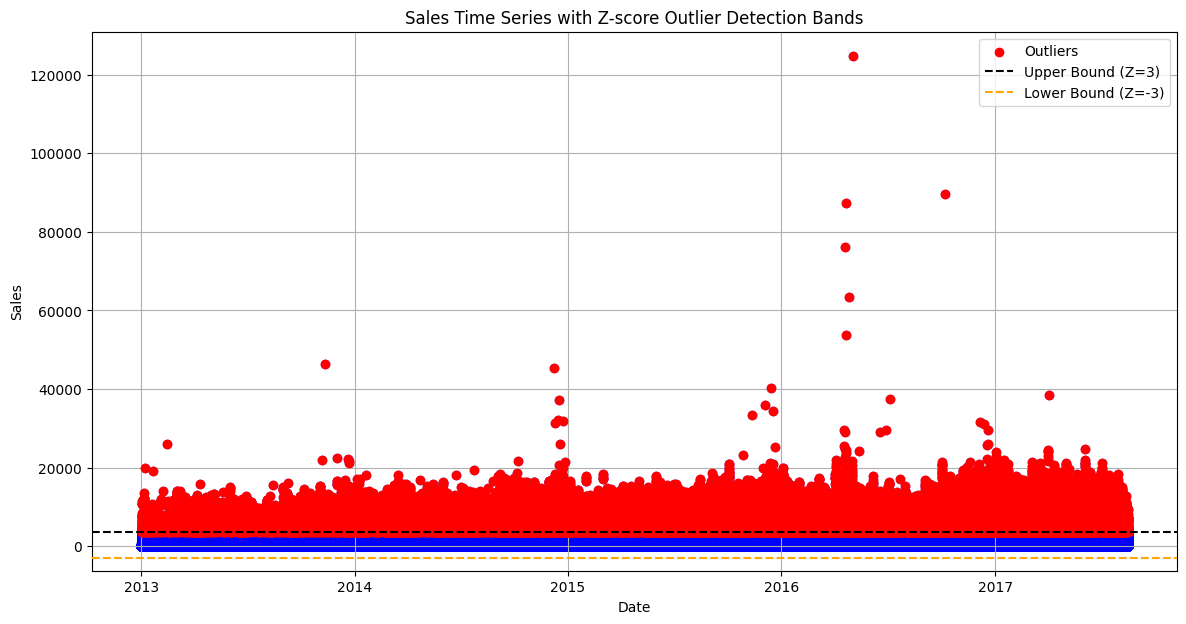

2.168458136391628


In [22]:
# Calculate mean and standard deviation
mean_sales = df_train['sales'].mean()
std_sales = df_train['sales'].std()

# Calculate upper and lower bounds for Z-score outlier detection
z_threshold = 3
upper_bound = mean_sales + (z_threshold * std_sales)
lower_bound = mean_sales - (z_threshold * std_sales)

plt.figure(figsize=(14, 7))
plt.scatter(df_train['date'], df_train['sales'], color='blue', alpha=0.6)

outliers = df_train[(df_train['sales'] > upper_bound) | (df_train['sales'] < lower_bound)]
plt.scatter(outliers['date'], outliers['sales'], color='red', label='Outliers', zorder=5)

plt.axhline(upper_bound, color='black', linestyle='--', label='Upper Bound (Z=3)', zorder=5)
plt.axhline(lower_bound, color='orange', linestyle='--', label='Lower Bound (Z=-3)', zorder=5)

plt.title('Sales Time Series with Z-score Outlier Detection Bands')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()
print((len(outliers) / len(df_train)) * 100)

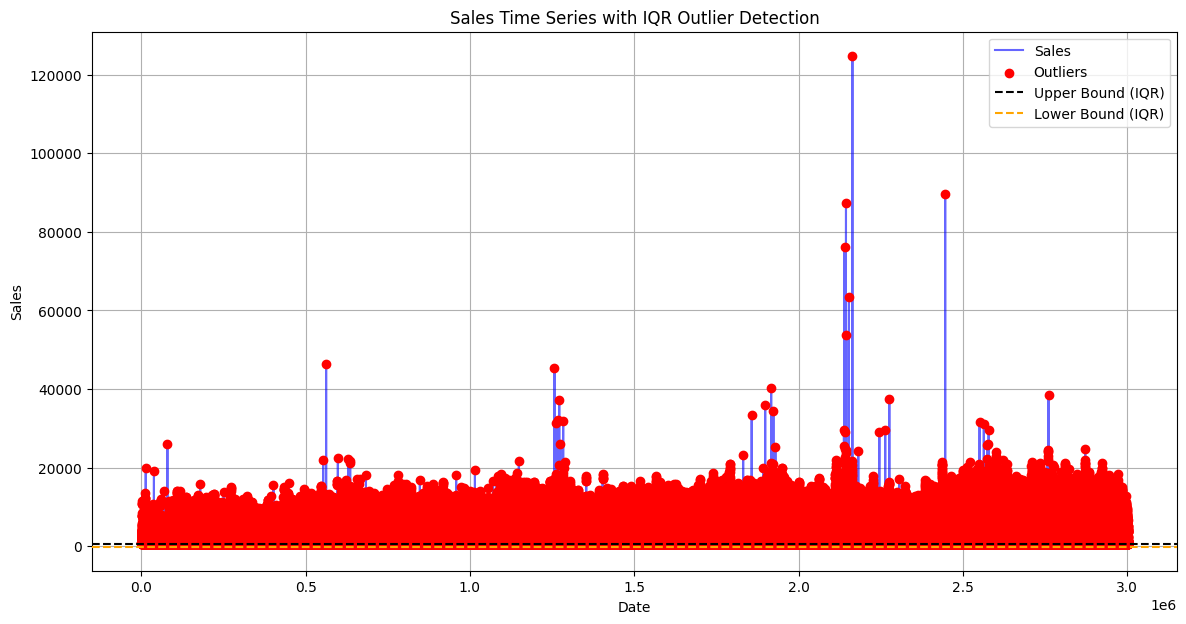

In [23]:
# Calculate the IQR bounds
q1 = df_train['sales'].quantile(0.25)
q3 = df_train['sales'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

plt.figure(figsize=(14, 7))
plt.plot(df_train.index, df_train['sales'], color='blue', label='Sales', alpha=0.6)


outliers = df_train[(df_train['sales'] > upper_bound) | (df_train['sales'] < lower_bound)]
plt.scatter(outliers.index, outliers['sales'], color='red', label='Outliers', zorder=5)

plt.axhline(upper_bound, color='black', linestyle='--', label='Upper Bound (IQR)', zorder=5)
plt.axhline(lower_bound, color='orange', linestyle='--', label='Lower Bound (IQR)', zorder=5)

plt.title('Sales Time Series with IQR Outlier Detection')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()


**(b) Decide whether to remove, cap, or transform the outliers. Justify your decisions** ✅
<br>
Removing rows because they have one or several irregular features is the last resort, as one should try to retain as much information as possible for the following training stage. Outlier removal is valid in extreme conditions say when we suspect there is a measurement error.

In [24]:
terremoto_dates = df_holidays_events[df_holidays_events['description'].str.contains('Terremoto Manabi', case=False, na=False)]['date']
terremoto_sales = df_train[df_train['date'].isin(terremoto_dates)]
non_terremoto_sales = df_train[~df_train['date'].isin(terremoto_dates)]
non_terremoto_sales.sort_values(by='sales', ascending=False).head(1)

event_dates = df_holidays_events[df_holidays_events['description'] == 'Cantonizacion de Quevedo']['date']

meats_sales_all_events = pd.DataFrame()

for event_date in event_dates:
    start_date = pd.to_datetime(event_date) - pd.Timedelta(days=7)
    end_date = pd.to_datetime(event_date) + pd.Timedelta(days=7)
    
    meats_sales = df_train[(df_train['family'] == 'MEATS') & 
                           (df_train['date'] >= start_date) & 
                           (df_train['date'] <= end_date)]
    
    meats_sales_all_events = pd.concat([meats_sales_all_events, meats_sales])

meats_sales_all_events.sort_values(by='sales', ascending=False).head()


,id,date,store_nbr,family,sales,onpromotion
2445984,2445984,2016-10-07,39,MEATS,89576.360,0
2455719,2455719,2016-10-13,12,MEATS,11609.557,17
490569,490569,2013-10-03,23,MEATS,3767.584,0
503043,503043,2013-10-10,23,MEATS,2749.505,0
501261,501261,2013-10-09,23,MEATS,2524.521,0


C:\Users\ander\AppData\Local\Temp\ipykernel_4452\378117191.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\IT3212\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


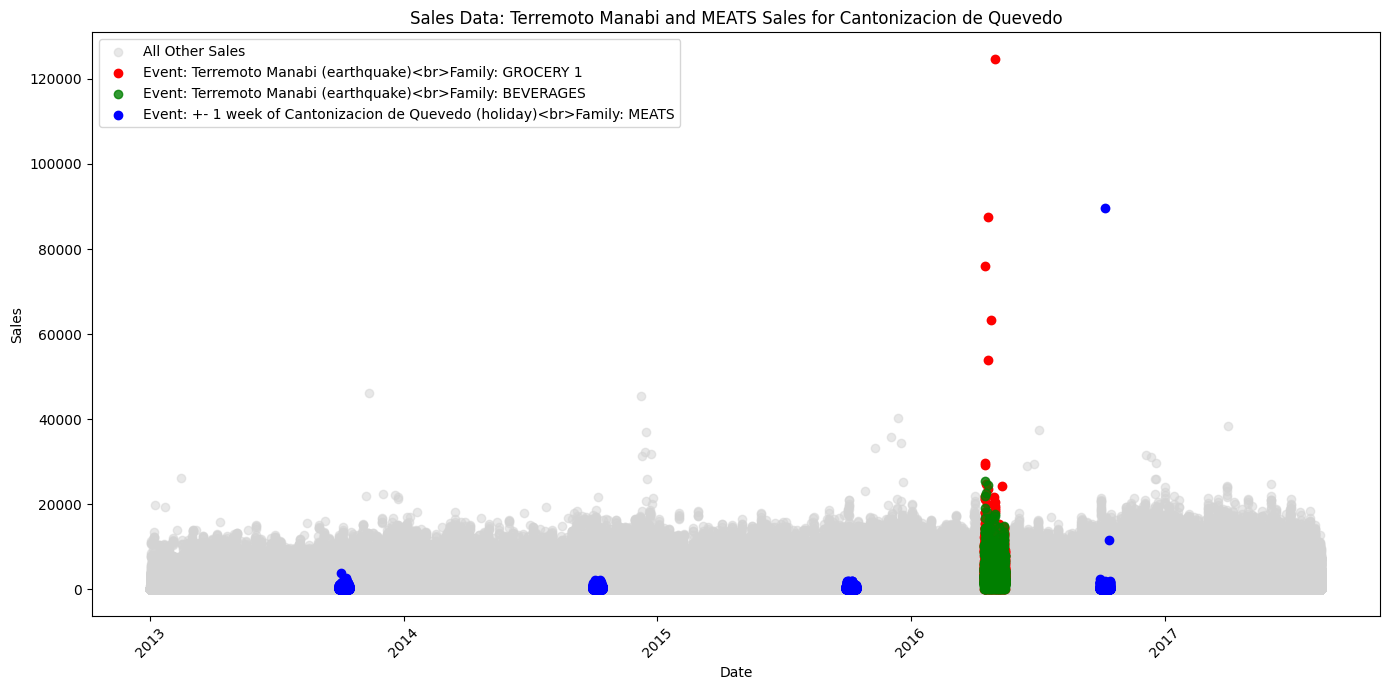

In [25]:
plt.figure(figsize=(14, 7))
plt.scatter(df_train['date'], df_train['sales'], label='All Other Sales', color='lightgray', alpha=0.5)

terremoto_grocery_1 = terremoto_sales[terremoto_sales['family'] == 'GROCERY I']
plt.scatter(terremoto_grocery_1['date'], terremoto_grocery_1['sales'], label='Event: Terremoto Manabi (earthquake)<br>Family: GROCERY 1', color='red', alpha=1)
terremoto_beverages = terremoto_sales[terremoto_sales['family'] == 'BEVERAGES']
plt.scatter(terremoto_beverages['date'], terremoto_beverages['sales'], label='Event: Terremoto Manabi (earthquake)<br>Family: BEVERAGES', color='green', alpha=0.8)

plt.scatter(meats_sales_all_events['date'], meats_sales_all_events['sales'], label='Event: +- 1 week of Cantonizacion de Quevedo (holiday)<br>Family: MEATS', color='blue', alpha=1)

plt.title('Sales Data: Terremoto Manabi and MEATS Sales for Cantonizacion de Quevedo')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

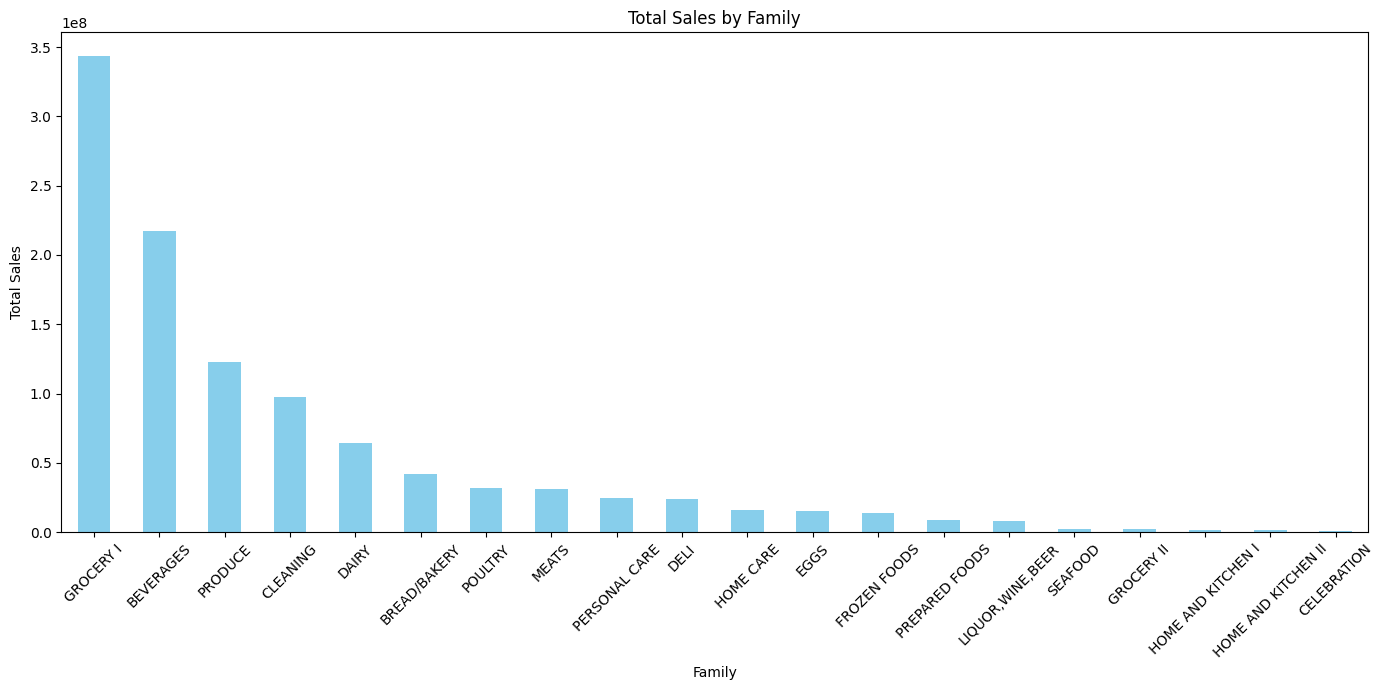

In [34]:
# Check for column existence before dropping
columns_to_drop = ['id', 'store_nbr', 'onpromotion']
df_train_filtered = df_train.drop(columns=[col for col in columns_to_drop if col in df_train.columns])

# Group by 'date' and 'family', summing the numeric columns
df_train_filtered = df_train_filtered.groupby(['date', 'family']).sum().reset_index()

df_train_filtered = df_train_filtered.sort_values(by='sales', ascending=False)

# Plot showing which families have the most sales
plt.figure(figsize=(14, 7))
family_sales = df_train_filtered.groupby('family')['sales'].sum().sort_values(ascending=False).head(20)
family_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Family')
plt.xlabel('Family')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [101]:
# Removing the which singular outlier which could not be explained
df_train = df_train[~((df_train['family'] == 'MEATS') & (df_train['sales'] == 89576.360))]

 <a id='task_4'></a>
___
### **TASK 4 - Data Transformation (30p)**
___

**(a) Encoding Categorical Data**
<br>
✅ **Apply label encoding or one-hot encoding to transform categorical data**

In [139]:
# Extracting date-related feature
df_train['date'] = pd.to_datetime(df_train['date'])
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['day_of_week'] = df_train['date'].dt.day_of_week
df_train['day_of_year'] = df_train['date'].dt.day_of_year
df_train['is_month_end'] = df_train['date'].dt.is_month_end
df_train['is_leap_year'] = df_train['date'].dt.is_leap_year

In [140]:
def encode_cyclical(a, max_value):
    x = (np.sin(2 * np.pi * a) + 1) / max_value
    y = (np.cos(2 * np.pi * a) + 1) / max_value
    return x, y

In [141]:
df_train['month_sin'], df_train['month_cos'] = encode_cyclical(df_train['month'], 12)
df_train['day_sin'], df_train['day_cos'] = encode_cyclical(df_train['day'], 31)
df_train['day_of_week_sin'], df_train['day_of_week_cos'] = encode_cyclical(df_train['day_of_week'], 7)
df_train['day_of_year_sin'], df_train['day_of_year_cos'] = encode_cyclical(df_train['day_of_year'], 366)

In [142]:
df_train = pd.get_dummies(df_train, columns=['family', 'store_nbr', 'is_month_end', 'is_leap_year'])#.astype(int)

In [143]:
df_train = df_train.drop(columns=['id', 'date', 'month', 'day'])

In [144]:
df_holidays_events = pd.get_dummies(df_holidays_events, columns=['locale', 'locale_name', 'type_holidays_events'])#.astype(int)
encoder = LabelEncoder()
df_holidays_events["description"] = encoder.fit_transform(df_holidays_events['description'])
df_holidays_events.head()

,date,description,transferred,locale_Local,locale_National,locale_Regional,locale_name_Ambato,locale_name_Cayambe,locale_name_Cotopaxi,locale_name_Cuenca,locale_name_Ecuador,locale_name_El Carmen,locale_name_Esmeraldas,locale_name_Guaranda,locale_name_Guayaquil,locale_name_Ibarra,locale_name_Imbabura,locale_name_Latacunga,locale_name_Libertad,locale_name_Loja,locale_name_Machala,locale_name_Manta,locale_name_Puyo,locale_name_Quevedo,locale_name_Quito,locale_name_Riobamba,locale_name_Salinas,locale_name_Santa Elena,locale_name_Santo Domingo,locale_name_Santo Domingo de los Tsachilas,type_holidays_events_Additional,type_holidays_events_Bridge,type_holidays_events_Event,type_holidays_events_Holiday,type_holidays_events_Transfer,type_holidays_events_Work Day
0,2012-03-02,25,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,2012-04-01,54,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,2012-04-12,18,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,2012-04-14,6,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,2012-04-21,8,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False


In [145]:
df_stores = pd.get_dummies(df_stores, columns=['city', 'state', 'type_stores'])#.astype(int)
df_stores.head()

,store_nbr,cluster,city_Ambato,city_Babahoyo,city_Cayambe,city_Cuenca,city_Daule,city_El Carmen,city_Esmeraldas,city_Guaranda,city_Guayaquil,city_Ibarra,city_Latacunga,city_Libertad,city_Loja,city_Machala,city_Manta,city_Playas,city_Puyo,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,state_Azuay,state_Bolivar,state_Chimborazo,state_Cotopaxi,state_El Oro,state_Esmeraldas,state_Guayas,state_Imbabura,state_Loja,state_Los Rios,state_Manabi,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,type_stores_A,type_stores_B,type_stores_C,type_stores_D,type_stores_E
0,1,13,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
1,2,13,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
2,3,8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
3,4,9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
4,5,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False


✅ **Justify your choice of encoding method**
<br>
In order for machine learning algorithms to process the data effectively all features must be in numerical form. In particular categorical data must be converted either using label encoding or one-hot encoding. The nature of the variable and the impact on model performance must be considered when selecting adequate encoding technique. We differentiate between ordinal and nominal features, the former is categories having a specific order or ranking, while the latter have no inherent ordering. Ordinal/nominal categories are mapped into label and one-hot encoding respectively.

Note that if a nominal category contains a large class of values, one-hot encoding will generate corresponding many new features which may impact model performance. Then label encoding may be considered to compact the number of features, but the downside is the model then may assume specific ordering or relationship among labels, which leads to biased results and incorrect predictions.

Here most categorical data was converted using one-hot encoding with the exception of holidays['description'] being so extensive that is is likely more efficient to use label encoding. There is not always a clear-cut answer so one might experiment with both encoding techniques to see which provides optimal model performance.

### Demonstration of sine-cosine embedding for encoding of cyclic features

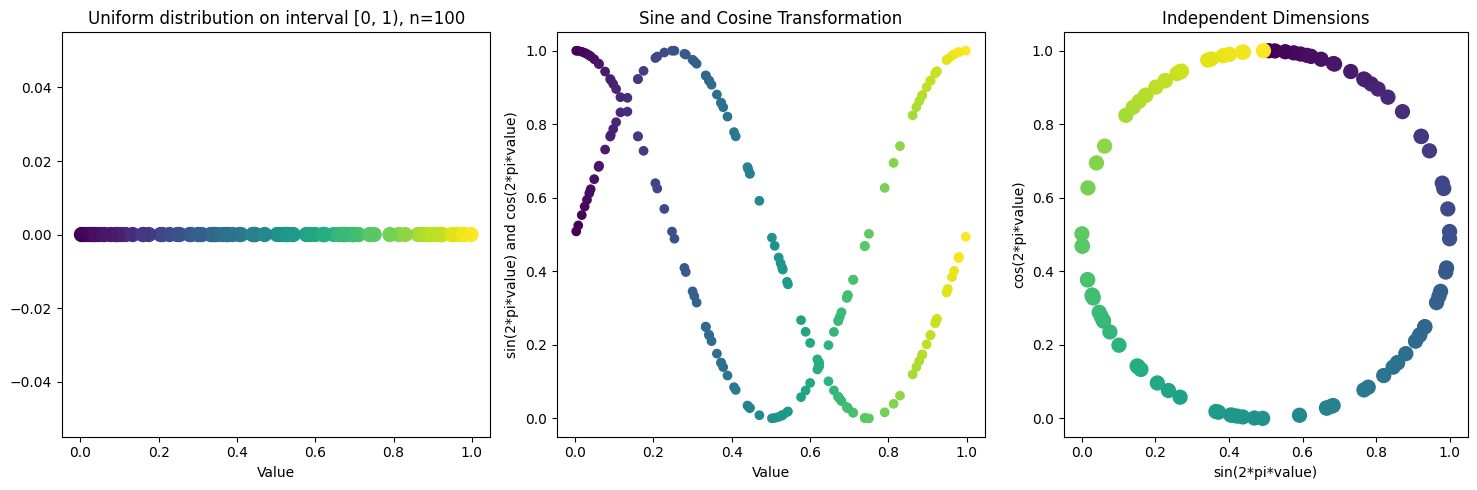

In [167]:
n = 100
x = np.random.uniform(size=n)
max_value = 2

sine_transformed, cosine_transformed = encode_cyclical(x, max_value)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(x, np.zeros(num_points), c=x, cmap='viridis', s=100)
ax[0].set_title("Uniform distribution on interval [0, 1), n=100")
ax[0].set_xlabel("Value")
ax[0].grid(False)

ax[1].scatter(x, sine_transformed, c=x, cmap='viridis', label='Sine')
ax[1].scatter(x, cosine_transformed, c=x, cmap='viridis', label='Cosine')
ax[1].set_title("Sine and Cosine Transformation")
ax[1].set_xlabel("Value")
ax[1].set_ylabel("sin(2*pi*value) and cos(2*pi*value)")

# Right subplot: Circular representation of Sine and Cosine
ax[2].scatter(sine_transformed, cosine_transformed, c=x, cmap='viridis', s=100)
ax[2].set_title("Independent Dimensions")
ax[2].set_xlabel("sin(2*pi*value)")
ax[2].set_ylabel("cos(2*pi*value)")
ax[2].set_aspect('equal', adjustable='box')  # Keep aspect ratio equal for circular display

# Adjust layout and display
plt.tight_layout()
plt.show()


**(b) Feature Scaling**
<br>
✅ **Apply feature scaling techniques**

In [115]:
min_max_scaler = MinMaxScaler()

In [146]:
columns_to_scale = ['sales', 'onpromotion', 'year', 'day_of_week', 'day_of_year']
df_train[columns_to_scale] = min_max_scaler.fit_transform(df_train[columns_to_scale])
df_train.head()

,sales,onpromotion,year,day_of_week,day_of_year,month_sin,month_cos,day_sin,day_cos,day_of_week_sin,day_of_week_cos,day_of_year_sin,day_of_year_cos,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,store_nbr_1,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,store_nbr_7,store_nbr_8,store_nbr_9,store_nbr_10,store_nbr_11,store_nbr_12,store_nbr_13,store_nbr_14,store_nbr_15,store_nbr_16,store_nbr_17,store_nbr_18,store_nbr_19,store_nbr_20,store_nbr_21,store_nbr_22,store_nbr_23,store_nbr_24,store_nbr_25,store_nbr_26,store_nbr_27,store_nbr_28,store_nbr_29,store_nbr_30,store_nbr_31,store_nbr_32,store_nbr_33,store_nbr_34,store_nbr_35,store_nbr_36,store_nbr_37,store_nbr_38,store_nbr_39,store_nbr_40,store_nbr_41,store_nbr_42,store_nbr_43,store_nbr_44,store_nbr_45,store_nbr_46,store_nbr_47,store_nbr_48,store_nbr_49,store_nbr_50,store_nbr_51,store_nbr_52,store_nbr_53,store_nbr_54,is_month_end_False,is_month_end_True,is_leap_year_False,is_leap_year_True
0,0.000,0.000,0.000,0.167,0.000,0.083,0.167,0.032,0.065,0.143,0.286,0.003,0.005,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,0.000,0.000,0.000,0.167,0.000,0.083,0.167,0.032,0.065,0.143,0.286,0.003,0.005,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
2,0.000,0.000,0.000,0.167,0.000,0.083,0.167,0.032,0.065,0.143,0.286,0.003,0.005,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
3,0.000,0.000,0.000,0.167,0.000,0.083,0.167,0.032,0.065,0.143,0.286,0.003,0.005,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [147]:
columns_to_scale = ['transactions']
df_transactions[columns_to_scale] = min_max_scaler.fit_transform(df_transactions[columns_to_scale])
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,0.092
1,2013-01-02,1,0.252
2,2013-01-02,2,0.282
3,2013-01-02,3,0.417
4,2013-01-02,4,0.229


In [148]:
columns_to_scale = ['dcoilwtico']
df_oil[columns_to_scale] = min_max_scaler.fit_transform(df_oil[columns_to_scale])
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,0.793
2,2013-01-03,0.791
3,2013-01-04,0.793
4,2013-01-07,0.794


✅ **Explain why feature scaling is necessary and how it impacts the model**
<br>
Notably one of the advantages of tree-based models is they can work directly on data without need for any feature scaling. However most machine learning algorithms including stochastic gradient descent (SGD), principal component analysis (PCA), distance-based algorithms (such k-nearest neighbours) and support vector machines (SVM), achieve stable and faster training with scaled features. Ultimately this can also improve overall performance of the trained model.

Feature scaling ensures that all features are on a comparable scale and range, and can prevent numerical instability (overflow or underflow problems) by avoiding significant scale disparities between features. Scaling/normalization is also critical in deep neural networks (batch normalization) so we can avoid the vansihing/exploding gradients problem.

Every feature should be able to contribute fairly during model training, but in real life data may comprise features of very different magintude, such that bigger scale features may dominate the learning, producing sub-optimal predictions. The machine learning models and algorithms does not account for unit of the values. So they tend to put more emphasis on greater valued features and less importance on smaller features, even if the smaller features can be of high signifigance.

 <a id='task_5'></a>
___
### **TASK 5 - Data Splitting (10p)**
___
**(a) Split the preprocessed dataset into training and testing sets** ✅
<br>
Note this dataset was explicitly provided with pre-defined training and test data, thus splitting is not strictly required. In the general case one is provided with a singular data volume, that must be divided into training and test sets. It is customary further splitting the training data into training and validation data, both used during the training process. Training data is provided to the learning algorithm to train the model (tuning of model parameters), while the validation data is important for optimizing the hyperparameters.

In [149]:
target_var = 'sales'
X = df_train.drop(columns=['sales'], axis=1)
y = df_train[target_var]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.8, random_state=RANDOM_SEED)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=0.5, random_state=RANDOM_SEED)

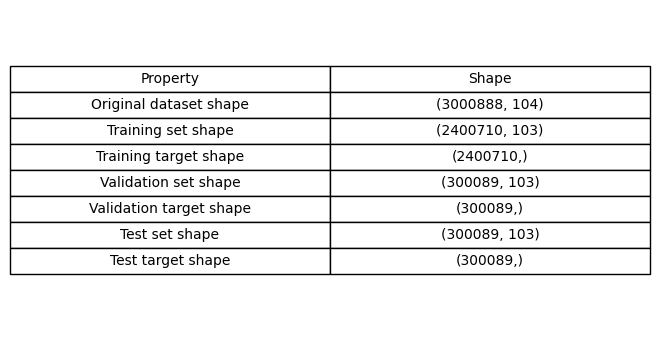

In [153]:
table_data = [
    ["Original dataset shape", df_train.shape],
    ["Training set shape", X_train.shape],
    ["Training target shape", y_train.shape],
    ["Validation set shape", X_val.shape],
    ["Validation target shape", y_val.shape],
    ["Test set shape", X_test.shape],
    ["Test target shape", y_test.shape],
]
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=table_data, colLabels=["Property", "Shape"], loc="center", cellLoc="center")
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()

**(b) Explain the importance of splitting the data and how it prevents overfitting** ✅
<br>
When constructing and training a model one must carefully balance model complexity/capacity against available training data. In many cases the model may achieve 100% performance metric evaluated on its training data. Perfect score is undesirable as this indicates the model has overfitted on training data, and is likely not to generalize well later on new unseen data. Overfitting and underfitting both lead to sub-optimal models and the trick is to train a model enough that it understands the most important characteristics of the training data, without learning all nitricate data details (such as noise or outliers). 

Test data is essential when conducting final evaluation of model performance after training is completed. Test data is a smaller batch of the original data set, that is kept aside/hidden from the model during training. When we evaluate the final model with this test data it should reveal how successfull the training was, and what level of performance one should expect from the model on the average case. Naturally the model performs shows better performance on training data compared to test data, however too large deviation might suggest overfitting.

One assumption is that training and test data are of same origin and therefore similar properties, this must be checked during data exploratory analsys. If they are too dissimilar this must be taken care of during data pre-processing. Often when splitting the data it can be beneficial to utilize random data sample scheme.

During model training the validation data set is not directly involved in traning the model, but plays a similar role to the test data. While training the model is evaluated on the validation data and we can utilize early stopping as a technique to avoid overfitting. The training loop is stopped once evaluation on validation data indicates overfitting.

 <a id='task_6'></a>
___
### **TASK 6 - Bonus Task (Optional - 10p)**
___

In [159]:
pca = PCA(n_components=0.8)
X_train_pca = pca.fit_transform(X_train)

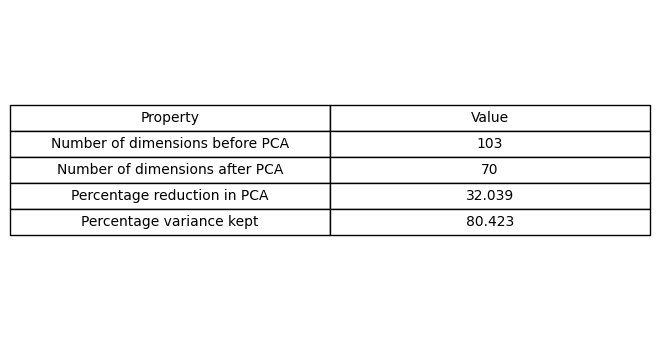

In [164]:
table_data_pca = [
    ["Number of dimensions before PCA", X_train.shape[1]],
    ["Number of dimensions after PCA", X_train_pca.shape[1]],
    ["Percentage reduction in PCA", ((X_train.shape[1] - X_train_pca.shape[1]) / X_train.shape[1]) * 100],
    ["Percentage variance kept", pca.explained_variance_ratio_.sum() * 100]
]

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=table_data_pca, colLabels=["Property", "Value"], loc="center", cellLoc="center")
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()